<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M5Sesi%C3%B3n3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Módulo 5**

**Sesión 3**
Algoritmos no supervisados

In [2]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [3]:
x, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=45)
K = 3

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.20)

modelo = KMeans(n_clusters=K).fit(x_train)
centroides = modelo.cluster_centers_
print(centroides)

[[-1.04239976 -0.44713466]
 [ 9.65076573  1.0035505 ]
 [-4.43797228 -8.33588927]]


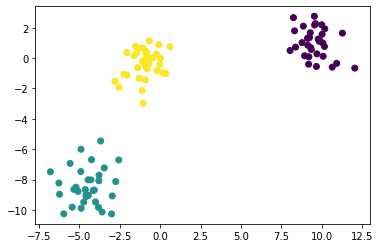

In [4]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

####**Reto 0**
- A continuación deberás seguir las instrucciones a detalle para generar una breve clusterización de los make_bloobs (número aleatorios generados). Éxito

**Paso 1**
- Genera 100,000 bloobs, con 8 centros y 2 características

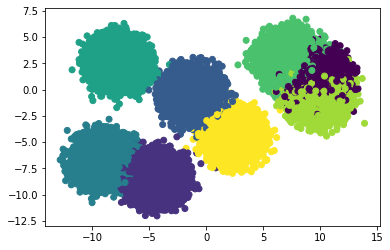

In [5]:
x, y = make_blobs(n_samples=100000, centers=8, n_features=2, random_state=45)
K = 8
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

**Paso 2**
- Ahora, usa lo aprendido en la sesión pasada (y visto en ejemplo anterior) para generar una partición de entrenamiento de 80% y con tetsing de 20%. Usalo nombrando 4 nuevas variables que se van a llamar x_train, x_test, y_train, y_test

In [6]:
modelo_0 = KMeans(n_clusters=K).fit(x_train)

**Paso 3**
- Acto seguido, gráfica tus bloobs y ve como se agrupan. Determina con base en ello el número de clusters necesarios, y definelos.
- También genera un print de los centroides
Paso importante: agrega a la gráfica una x con los centroides generados

In [7]:
centroides = modelo_0.cluster_centers_
print(centroides)

[[-3.40563714e+00 -6.99323897e+00]
 [ 9.32267225e+00  1.21318131e+00]
 [-7.60207644e-01  5.02595372e-02]
 [-4.50923080e+00 -9.90639329e+00]
 [-5.67648429e+00 -7.22929367e+00]
 [ 1.12092098e+01  7.80414975e-03]
 [-1.74788004e+00 -1.69062015e+00]
 [-4.39275785e+00 -8.57183034e+00]]


**Ejemplo 2**

- Dataset de salarios: datum.csv

In [8]:
#Dataset de salarios de trabajadores
data = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2003.%20Clusterizaci%C3%B3n/Reto%2001/datum.csv", sep=",")
data.head()

,No,Sexo,Edad,Total Ventas,Salario
0,1,H,60,69900,6325
1,2,H,30,79000,5200
2,3,M,52,85500,7825
3,4,M,57,17100,8375
4,5,M,55,5500,5450


In [9]:
#Elegir las columnas Total_Ventas y Salario
X = data.iloc[:,2:]
X.head()

,Edad,Total Ventas,Salario
0,60,69900,6325
1,30,79000,5200
2,52,85500,7825
3,57,17100,8375
4,55,5500,5450


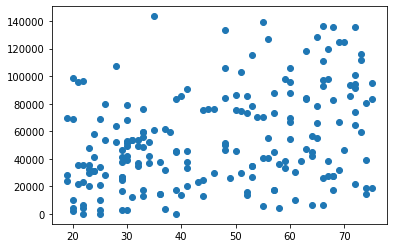

In [10]:
#Separar variables
X = data.iloc[:,2:].values
x1 = X[:,0]
y1 = X[:,1]
#Scatter plot para ver relación entre variables de ventas y salarios
plt.scatter(x1, y1)
plt.show()

**WCSS**

Método para elegir la cantidad óptima de clústers a emplear en la clasificación.
- Para que la similitud al interior del clúster sea la más cercana.
- Para que la diferencia entre clústers sea la mayor posible.

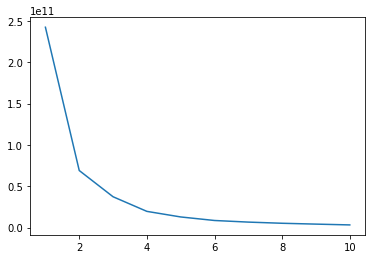

In [11]:
#WCSS Within-Cluster-Sum-of-Squares
wcss = []
#Probamos rango desde 1 hasta 11 clústers
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss);
# Eje de las x representa el número de clústers, eje de las y es el error cuadrático.

In [12]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X)
print(kmeans.cluster_centers_)
clusters = kmeans.fit_predict(X)
#Agregar la variable categórica "label" para guardar el número de clúster
data["label"]=clusters
print(clusters)


[[5.77391304e+01 1.04386957e+05 7.28913043e+03]
 [4.42608696e+01 5.86434783e+04 5.84492754e+03]
 [4.14235294e+01 2.20694118e+04 5.32088235e+03]]
[2 2 1 0 0 0 0 2 0 0 2 1 2 0 1 1 1 0 2 2 0 0 1 2 1 2 0 2 0 0 0 0 2 1 0 2 2
 0 2 1 1 0 1 0 0 0 2 2 2 1 0 2 1 1 2 1 0 1 0 2 1 1 2 0 2 0 2 1 0 0 1 2 1 2
 0 0 1 2 0 0 0 0 0 2 1 2 2 0 0 0 2 0 1 2 0 2 0 1 0 0 0 1 2 0 0 2 1 0 2 1 1
 1 2 2 1 2 0 1 0 2 0 2 1 2 2 2 0 0 1 0 0 2 2 2 2 0 2 2 1 2 1 0 0 2 2 2 0 0
 0 0 0 2 2 0 2 1 0 2 1 0 2 0 0 0 0 0 2 1 0 0 1 0 0 0 2 0 0 2 1 2 2 2 2 1 1
 1 0 0 0 0 2 0 0 2 0 1 1 0 2 2]


In [13]:
data = data.rename(columns={"Total Ventas": "Total_Ventas"})
data.head()

,No,Sexo,Edad,Total_Ventas,Salario,label
0,1,H,60,69900,6325,2
1,2,H,30,79000,5200,2
2,3,M,52,85500,7825,1
3,4,M,57,17100,8375,0
4,5,M,55,5500,5450,0


In [14]:
dt = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2003.%20Clusterizaci%C3%B3n/Ejercicio%2001/datum-ej.csv")
dt.head()

,Sexo,Edad,Total_Ventas,Salario
0,M,46,29800,4100
1,H,68,83000,8125
2,M,60,66400,5775
3,H,49,25900,3400
4,H,22,0,7075


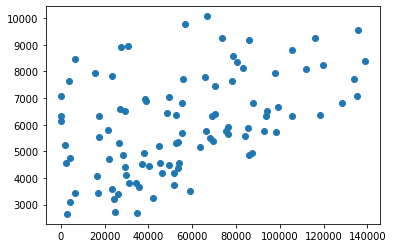

In [15]:
X = dt.iloc[:,2:].values
#print(X)
x1 = X[:,0]
y1 = X[:,1]
plt.scatter(x1,y1)
plt.show()

[[ 21512.19512195   5185.36585366]
 [ 65460.97560976   6232.92682927]
 [113258.82352941   7382.35294118]]


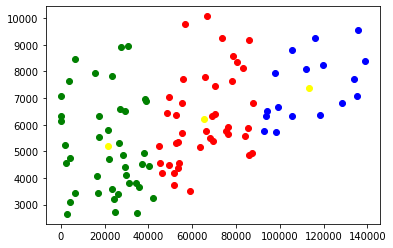

In [16]:
kmeans = KMeans( n_clusters = 3, init = 'k-means++')
kmeans.fit(X)
print(kmeans.cluster_centers_)

clusters = kmeans.fit_predict(X)
dt["label"] = clusters
#print(clusters)

plt.scatter(dt.Total_Ventas[dt.label == 0 ],dt.Salario[dt.label == 0],color = "red")
plt.scatter(dt.Total_Ventas[dt.label == 1 ],dt.Salario[dt.label == 1],color = "green")
plt.scatter(dt.Total_Ventas[dt.label == 2 ],dt.Salario[dt.label == 2],color = "blue")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color = "yellow")
plt.show()

**Reto 1**
- Ahora, tú deberás generar una clusterización con base en los datos proporcionados para el reto actual. Las variables siguen la misma lógica que el ejemplo respectivo: Estamos en una agencia de comercio internacional, y contamos con las variables: salarios emparentados con ventas por volúmen y la edad de los vendedores.

- Paso 01. Cargue y manipule los datos
- Paso 02. Use y grafique uno de los métodos desarrollados por él Experto para decidir la cantidad de Clusters a emplear
- Paso 03. Visualice los clusters agrupados en un scatter plot de Pyplot.

**Ejemplo 3**

In [17]:
import seaborn as sns
from tqdm import tqdm

In [19]:
data3 = pd.read_csv("/content/drive/MyDrive/DataSets2 ML/red-red-wine.csv")
data3.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
data3.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


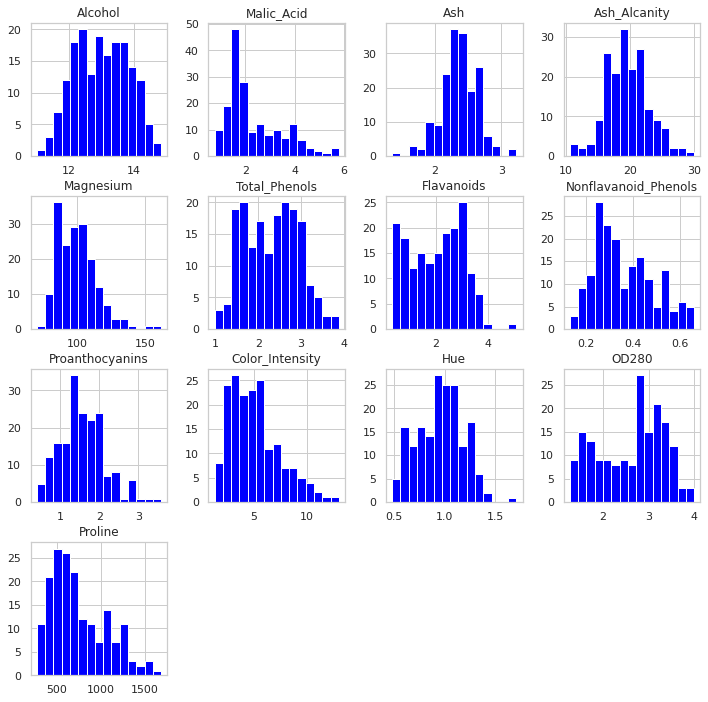

In [21]:
#Barplots
sns.set(style="whitegrid", font_scale=1.0, rc={"figure.figsize":(12,12)})
ax=data3.hist(bins=15, color="blue");

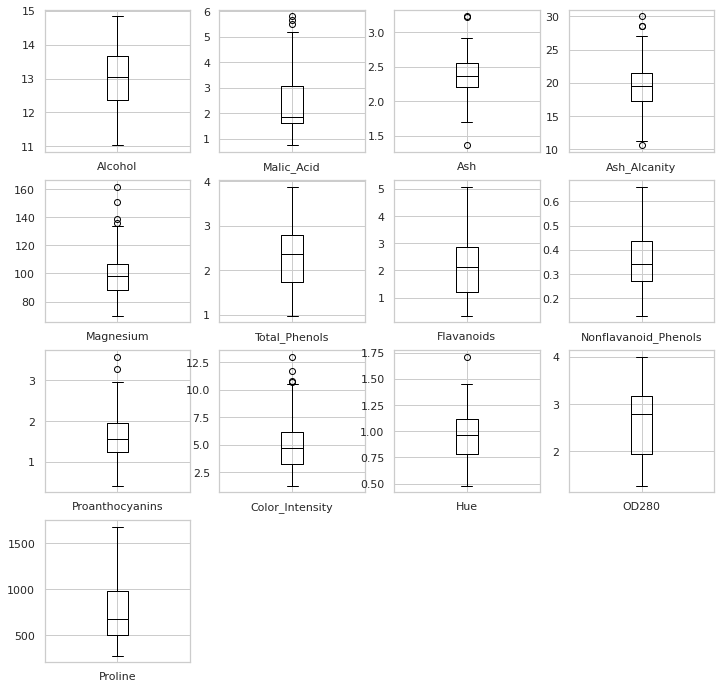

In [22]:
# Boxplots para todas las variables
data3.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

In [23]:
#Estandarizar datos
from sklearn.preprocessing import StandardScaler

In [24]:
#Estandarizar datos
std_scaler = StandardScaler()
data_cluster = data3.copy()
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

In [25]:
data_cluster.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


**Reducción de dimensiones**

Como acá tenemos 13 distintas variables que incluso podemos conceptualizar como "dimensiones" de los vinos, deseamos generar agrupaciones tales que reduzcamos esas "dimensiones" con el motivo de generar una gráfica estética y visual para en el plano cartesiano. Vamos a generarlo con 2 dimensiones reducidas

In [26]:
#Elegir 2 componentes
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)

print('Varianza acumulada explicada por 2 componentes principales:  {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))


Varianza acumulada explicada por 2 componentes principales:  55.41%


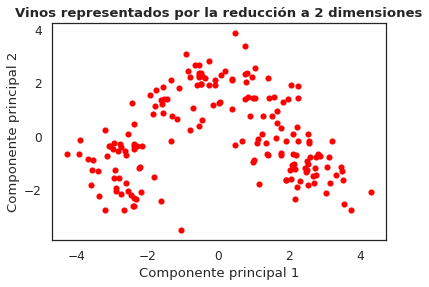

In [27]:
#Gráfica con 2 PC
sns.set(style='white', rc={'figure.figsize':(6,4)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Vinos representados por la reducción a 2 dimensiones',fontweight='bold')
plt.show()

**K-Means**
- Cálculo de K-Means necesarios

**Método del codo**

In [28]:
import sklearn.cluster as cluster
inertia = []
# tqdm: computa el tiempo que tarda en calcular el loop, va sumando cada iteración
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters = i,
                            init = 'k-means++',
                            n_init = 15,
                            max_iter = 500,
                            random_state = 17)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 12.57it/s]


**Método de la silueta**

In [29]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00,  9.66it/s]


**Graficar**

- Método del codo
- Método de la silueta

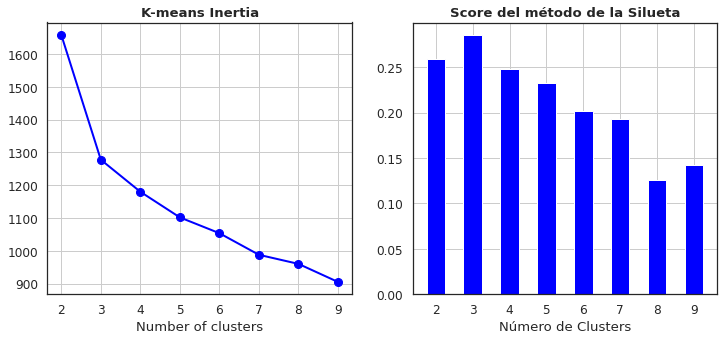

In [30]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='blue')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'blue',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Score del método de la Silueta',fontweight='bold')
plt.xlabel('Número de Clusters')


plt.show()

**EDA de clusters generados**

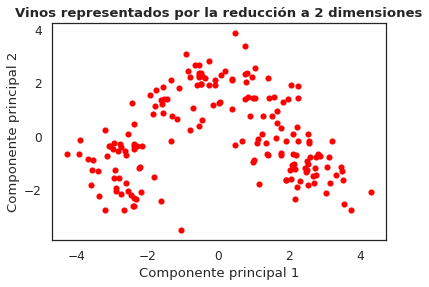

In [31]:
sns.set(style='white', rc={'figure.figsize':(6,4)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Vinos representados por la reducción a 2 dimensiones',fontweight='bold')
plt.show()